# Feature engineering

Colunas FUNIL_ASSINATURA_PIPEDRIVE_status até ATENDIMENTOS_AGENDA_Datas Atendimento Médico

In [157]:
import pandas as pd

data = pd.read_csv("../data/data-preprocessed.csv")


In [158]:
import missingno as msno

In [159]:
data.iloc[:,13:26].head()

,FUNIL_ASSINATURA_PIPEDRIVE_status,FUNIL_ASSINATURA_PIPEDRIVE_start_of_service,FUNIL_ASSINATURA_PIPEDRIVE_lost_time,FUNIL_ASSINATURA_PIPEDRIVE_lost_reason,FUNIL_ONBOARDING_PIPEDRIVE_add_time,FUNIL_ONBOARDING_PIPEDRIVE_status,FUNIL_ONBOARDING_PIPEDRIVE_lost_reason,FUNIL_ONBOARDING_PIPEDRIVE_activities_count,ATENDIMENTOS_AGENDA_Qde Todos Atendimentos,ATENDIMENTOS_AGENDA_Faltas Todos Atendimento,ATENDIMENTOS_AGENDA_Qde Atendimento Médico,ATENDIMENTOS_AGENDA_Faltas Atendimento Médico,ATENDIMENTOS_AGENDA_Datas Atendimento Médico
0,won,2021-01-28,2023-12-10,Outro,2021-09-16 18:14:49,won,Outro,0,1,0,0,0,Nunca ocorreu
1,lost,2020-12-16,2021-11-18,[Assinatura] Empresa cancelou o benefício da Ana,2021-09-16 18:15:46,lost,Outro,0,0,0,0,0,Nunca ocorreu
2,lost,2021-01-21,2021-03-16,[Assinatura] Empresa cancelou o benefício da Ana,Não iniciado,Não iniciado,Outro,0,0,0,0,0,Nunca ocorreu
3,lost,2020-12-17,2021-04-27,[Assinatura] Empresa cancelou o benefício da Ana,Não iniciado,Não iniciado,Outro,0,0,0,0,0,Nunca ocorreu
4,lost,2021-01-18,2021-03-16,[Assinatura] Empresa cancelou o benefício da Ana,Não iniciado,Não iniciado,Outro,0,0,0,0,0,Nunca ocorreu


<Axes: >

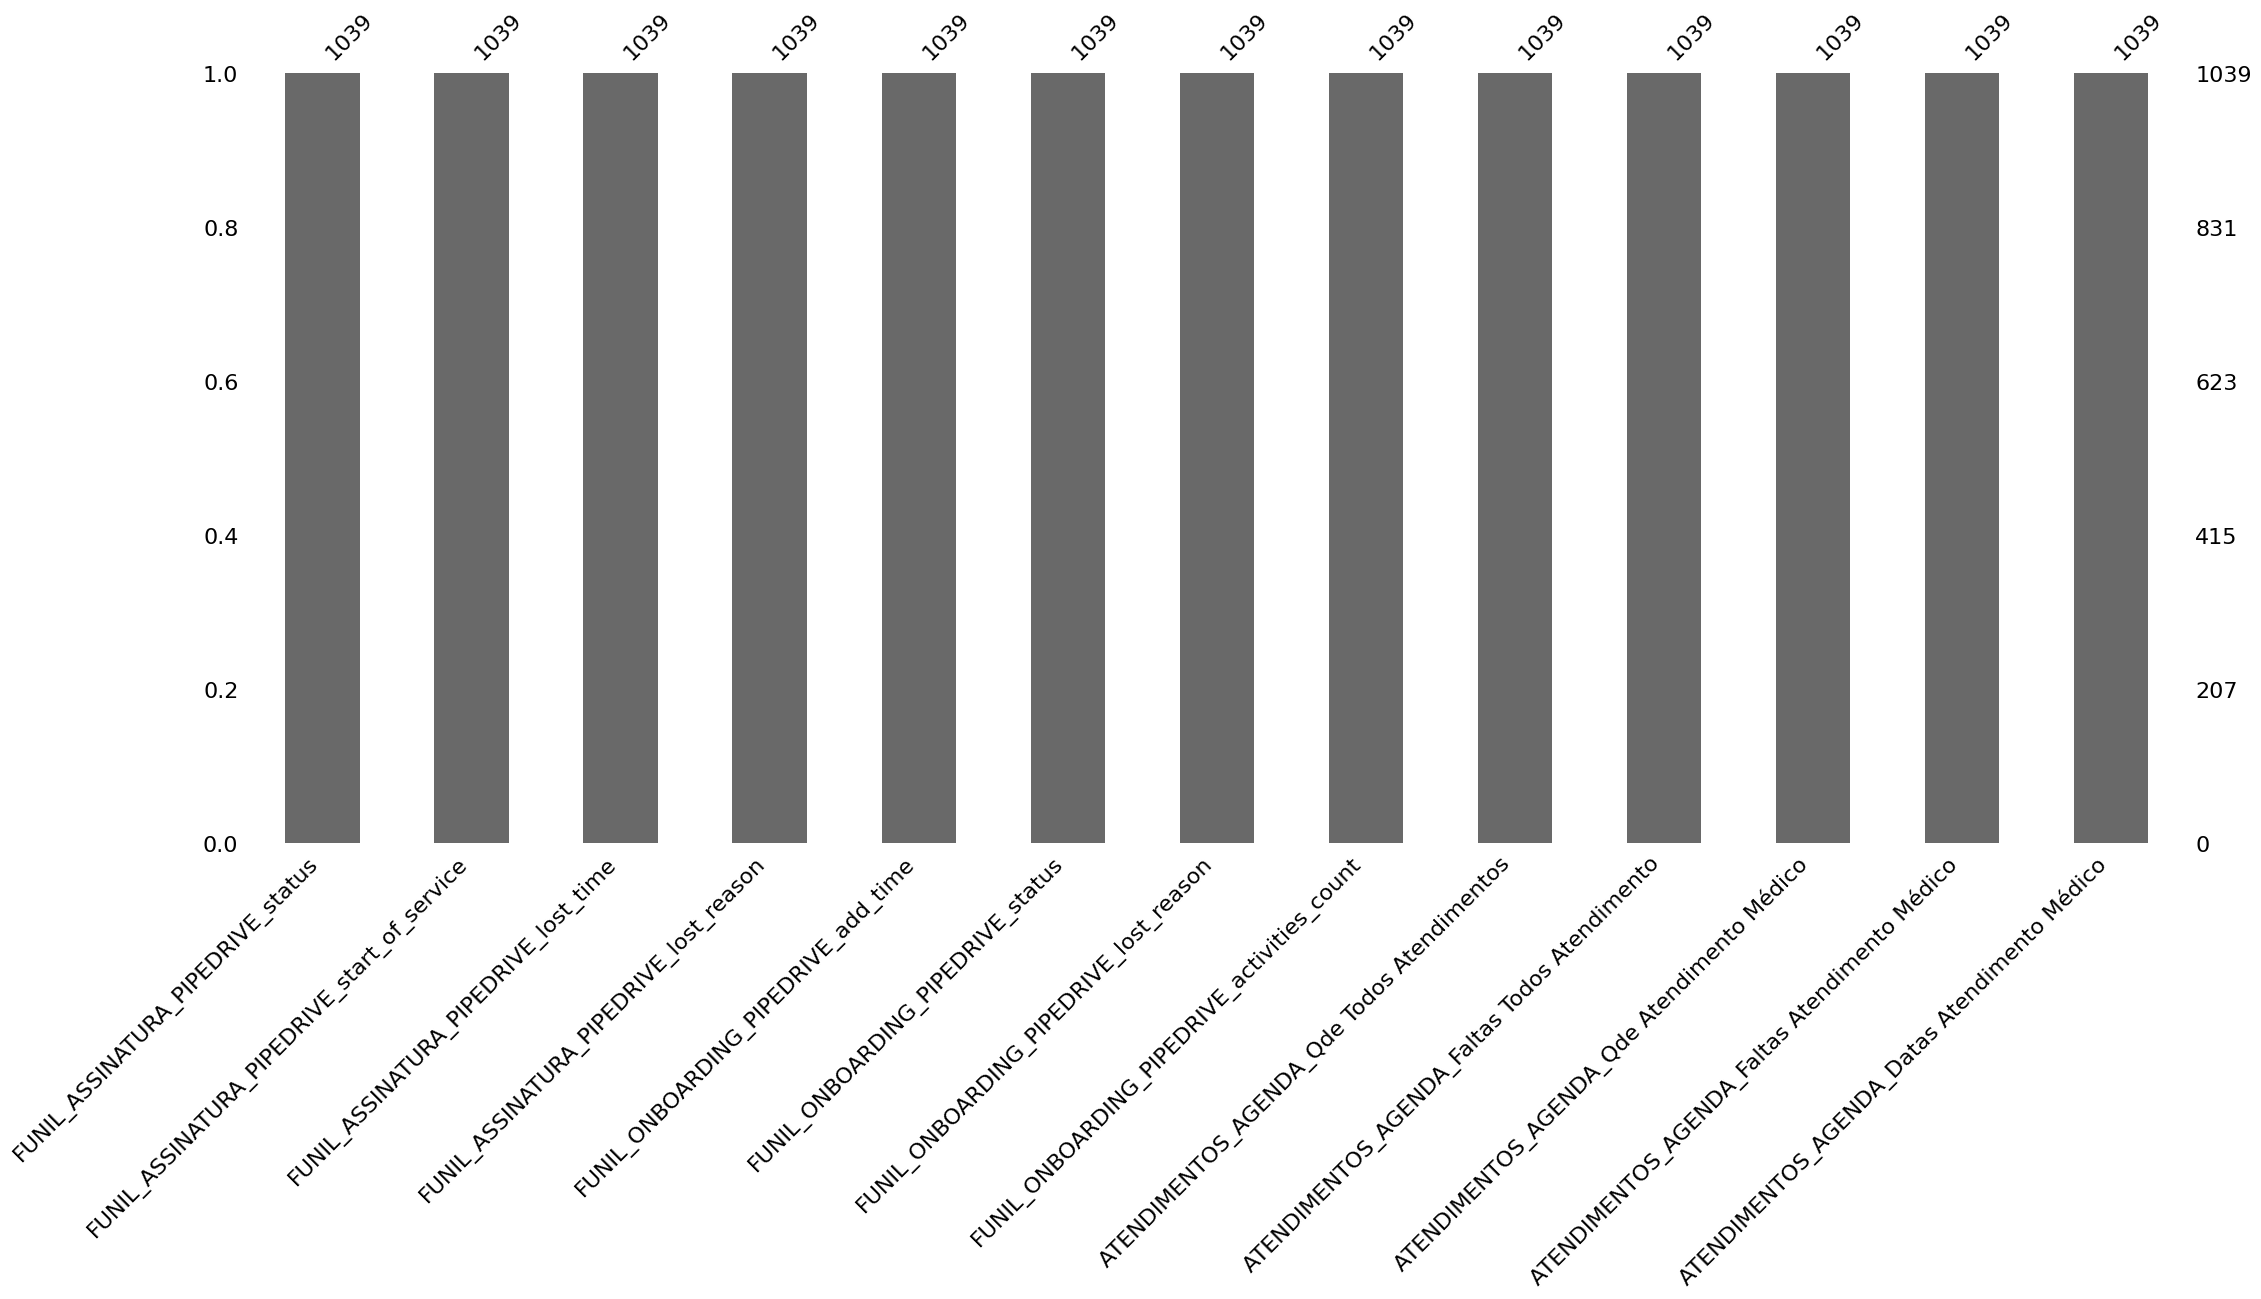

In [160]:
msno.bar(data.iloc[:,13:26])

## Coluna extra: Tempo de permanência

Coluna "stay_time" criada para calcular tempo total do usuário na plataforma. Utiliza lost_time - start_of_service ou lost_time - contract_start_date, se os dados de start_of_service forem nulos. 

In [161]:
import pandas as pd
from datetime import datetime

tempo_permanencia = []

for indice, valor in data["FUNIL_ASSINATURA_PIPEDRIVE_start_of_service"].items():
  if pd.notna(valor):
      index = data.loc[indice, "FUNIL_ASSINATURA_PIPEDRIVE_start_of_service"].find(";")
      if index != -1:
        data.loc[indice, "FUNIL_ASSINATURA_PIPEDRIVE_start_of_service"] = data.loc[indice, "FUNIL_ASSINATURA_PIPEDRIVE_start_of_service"][:index]

for indice, valor in data["FUNIL_ASSINATURA_PIPEDRIVE_lost_time"].items():
  if pd.notna(valor):
    if data.loc[indice, "FUNIL_ASSINATURA_PIPEDRIVE_lost_time"] != "Em aberto":	
      if pd.notna(data.loc[indice, "FUNIL_ASSINATURA_PIPEDRIVE_start_of_service"]):
        tempo_1 = datetime.strptime(data.loc[indice, "FUNIL_ASSINATURA_PIPEDRIVE_lost_time"], '%Y-%m-%d')
        tempo_2 = datetime.strptime(data.loc[indice, "FUNIL_ASSINATURA_PIPEDRIVE_start_of_service"], '%Y-%m-%d')
        tempo_permanencia.append(str(tempo_1 - tempo_2))
      else:
        tempo_1 = datetime.strptime(data.loc[indice, "FUNIL_ASSINATURA_PIPEDRIVE_lost_time"], '%Y-%m-%d')
        tempo_2 = datetime.strptime(data.loc[indice, "PESSOA_PIPEDRIVE_contract_start_date"], '%Y-%m-%d')
        tempo_permanencia.append(str(tempo_1 - tempo_2))
    else:
      tempo_permanencia.append("Em aberto")

data['stay_time'] = tempo_permanencia

for indice, valor in data["stay_time"].items():
  if valor != "Em aberto":
    index = data.loc[indice, "stay_time"].find(",")
    if index != -1:
      data.loc[indice, "stay_time"] = data.loc[indice, "stay_time"][:index]

data['stay_time']



0       1046 days
1        337 days
2         54 days
3        131 days
4         57 days
          ...    
1034      10 days
1035      10 days
1036      10 days
1037      10 days
1038      10 days
Name: stay_time, Length: 1039, dtype: object

## Coluna extra: Último processo de onboarding concluído

Coluna criada usando as informações de stay_in_pipeline_stages_welcome, stay_in_pipeline_stages_first_meeting e stay_in_pipeline_stages_whoqol. Mostra o último processo concluído. 


In [162]:
# ultimos_estados = []

# for indice, valor in data["FUNIL_ONBOARDING_PIPEDRIVE_add_time"].items():
#     if valor != "Não iniciado":
#         if pd.notna(data.loc[indice, "FUNIL_ONBOARDING_PIPEDRIVE_stay_in_pipeline_stages_welcome"]):
#             if pd.notna(data.loc[indice, "FUNIL_ONBOARDING_PIPEDRIVE_stay_in_pipeline_stages_first_meeting"]):
#                 if pd.notna(data.loc[indice, "FUNIL_ONBOARDING_PIPEDRIVE_stay_in_pipeline_stages_whoqol"]):
#                     ultimos_estados.append("Questionário")
#                 else:
#                     ultimos_estados.append("Primeira reunião")
#             else:
#                 ultimos_estados.append("Boas-vindas")
        
#     else:
#         ultimos_estados.append("Não iniciado")

# data["last_stage_concluded"] = ultimos_estados

# data.drop(["FUNIL_ONBOARDING_PIPEDRIVE_stay_in_pipeline_stages_welcome", "FUNIL_ONBOARDING_PIPEDRIVE_stay_in_pipeline_stages_first_meeting", "FUNIL_ONBOARDING_PIPEDRIVE_stay_in_pipeline_stages_whoqol"], axis=1, inplace=True)

## Coluna extra: duração de onboarding

Combina as informações de won_time e lost_time em uma única coluna. Se tiver lost time, usa lost time; se tiver won time, usa won time; se add time for null, usar "não iniciado"; do contrario, usar "em aberto".


In [163]:
# ## Coluna extra: duração de onboarding

# # Combina as informações de won_time e lost_time em uma única coluna. Se tiver lost time, usa lost time; se tiver won time, usa won time; se add time for null, usar "não iniciado"; do contrario, usar "em aberto".

# tempo = []

# for indice, valor in data["FUNIL_ONBOARDING_PIPEDRIVE_add_time"].items():
#     if valor != "Não iniciado":
#         if pd.notna(data.loc[indice, "FUNIL_ONBOARDING_PIPEDRIVE_lost_time"]) == True:
#             tempo.append(data.loc[indice, "FUNIL_ONBOARDING_PIPEDRIVE_lost_time"])
#         elif pd.notna(data.loc[indice, "FUNIL_ONBOARDING_PIPEDRIVE_won_time"]) == True:
#             tempo.append(data.loc[indice, "FUNIL_ONBOARDING_PIPEDRIVE_won_time"])
#         else:
#             tempo.append("Em aberto")
#     else:
#         tempo.append("Não iniciado")

# data['process_time'] = tempo



# for indice, valor in data["process_time"].items():
#   if data.loc[indice, "process_time"] != "Não iniciado" and data.loc[indice, "process_time"] != "Em aberto":
#     data.loc[indice, "process_time"] = pd.to_datetime(data.loc[indice, "process_time"], format='%Y-%m-%d', errors='coerce')
#     data.loc[indice, "process_time"] = data.loc[indice, "process_time"].strftime('%Y-%m-%d')

# data.drop(["FUNIL_ONBOARDING_PIPEDRIVE_won_time", "FUNIL_ONBOARDING_PIPEDRIVE_lost_time"], axis=1, inplace=True)



## FUNIL_ASSINATURA_PIPEDRIVE_status

Transforma dados da coluna em one not encoding

In [164]:
data['FUNIL_ASSINATURA_PIPEDRIVE_status'].value_counts()

FUNIL_ASSINATURA_PIPEDRIVE_status
won     537
lost    502
Name: count, dtype: int64

In [165]:
one_hot_encoded = pd.get_dummies(data['FUNIL_ASSINATURA_PIPEDRIVE_status'], prefix='status')
data = pd.concat([data, one_hot_encoded], axis=1)

## FUNIL_ONBOARDING_PIPEDRIVE_status

One-hot encoding aplicado nessa coluna

In [166]:
data['FUNIL_ONBOARDING_PIPEDRIVE_status'].value_counts()

FUNIL_ONBOARDING_PIPEDRIVE_status
won             617
lost            278
open             98
Não iniciado     46
Name: count, dtype: int64

In [167]:
data_status_encoded = pd.get_dummies(data['FUNIL_ONBOARDING_PIPEDRIVE_status'], prefix='Status')
data = pd.concat([data, data_status_encoded], axis=1)

## FUNIL_ONBOARDING_PIPEDRIVE_lost_reason

One hot encoding aplicado na coluna

In [168]:
data['FUNIL_ONBOARDING_PIPEDRIVE_lost_reason'].value_counts()

FUNIL_ONBOARDING_PIPEDRIVE_lost_reason
Outro                                                                797
[Onboarding] Não retornou aos contatos de resgate                    207
[Onboarding] Não tem interesse em seguir nas etapas do onboarding     23
[Associade] Cancelou assinatura                                       12
Name: count, dtype: int64

In [169]:
lost_reason_dummies = pd.get_dummies(data['FUNIL_ONBOARDING_PIPEDRIVE_lost_reason'], prefix='lost_reason')
data = pd.concat([data, lost_reason_dummies], axis=1)


## FUNIL_ASSINATURA_PIPEDRIVE_lost_reason

Faz one hot encoding para motivos de cancelamento de assinatura

In [170]:
data['FUNIL_ASSINATURA_PIPEDRIVE_lost_reason'].value_counts()

FUNIL_ASSINATURA_PIPEDRIVE_lost_reason
Outro                                                         597
[Assinatura] Desligamento                                     230
[Assinatura] Empresa cancelou o benefício da Ana               94
[Assinatura] Não quer seguir com a Ana                         57
[Assinatura] Precisou cortar custos                            25
[Assinatura] Cancelamento por inadimplência                    18
[Assinatura] Está sem tempo para conciliar os atendimentos     18
Name: count, dtype: int64

In [171]:
lost_reason_dummies = pd.get_dummies(data['FUNIL_ASSINATURA_PIPEDRIVE_lost_reason'], prefix='lost_reason')
data = pd.concat([data, lost_reason_dummies], axis=1)

data

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_contract_start_date,PESSOA_PIPEDRIVE_contract_end_date,PESSOA_PIPEDRIVE_Canal de Preferência,PESSOA_PIPEDRIVE_notes_count,...,lost_reason_[Associade] Cancelou assinatura,lost_reason_[Onboarding] Não retornou aos contatos de resgate,lost_reason_[Onboarding] Não tem interesse em seguir nas etapas do onboarding,lost_reason_Outro,lost_reason_[Assinatura] Cancelamento por inadimplência,lost_reason_[Assinatura] Desligamento,lost_reason_[Assinatura] Empresa cancelou o benefício da Ana,lost_reason_[Assinatura] Está sem tempo para conciliar os atendimentos,lost_reason_[Assinatura] Não quer seguir com a Ana,lost_reason_[Assinatura] Precisou cortar custos
0,250,64,82,São Paulo,São Paulo,04534-020,2021-01-28,NaN,0,1,...,False,False,False,True,False,False,False,False,False,False
1,254,64,80,North Carolina,Mecklenburg County,28203,2020-12-16,2021-11-18,0,0,...,False,False,False,False,False,False,True,False,False,False
2,314,64,80,São Paulo,São Paulo,05337-030,2021-01-21,2021-03-16,0,0,...,False,False,False,False,False,False,True,False,False,False
3,315,64,80,São Paulo,São Paulo,NaN,2020-12-17,2021-04-27,0,0,...,False,False,False,False,False,False,True,False,False,False
4,317,64,80,São Paulo,São Paulo,05421-050,2021-01-18,2021-03-16,0,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,6009,63,80,São Paulo,São Caetano do Sul,09540-000,2023-11-30,NaN,0,0,...,False,False,False,True,False,False,False,False,False,False
1035,6010,63,80,Paraná,Curitiba,81750-010,2023-11-30,NaN,0,0,...,False,False,False,True,False,False,False,False,False,False
1036,6011,63,80,São Paulo,São Paulo,03381-130,2023-11-30,NaN,0,0,...,False,False,False,True,False,False,False,False,False,False
1037,6012,64,80,São Paulo,Hortolândia,13187-147,2023-11-30,NaN,239,0,...,False,False,False,True,False,False,False,False,False,False


## FUNIL_ASSINATURA_PIPEDRIVE_start_of_service

Substitui valores nulos pela data de início do contrato e transforma o tipo em datetime

In [172]:
data['FUNIL_ASSINATURA_PIPEDRIVE_start_of_service']

0       2021-01-28
1       2020-12-16
2       2021-01-21
3       2020-12-17
4       2021-01-18
           ...    
1034    2023-11-30
1035    2023-11-30
1036    2023-11-30
1037    2023-11-30
1038    2023-11-30
Name: FUNIL_ASSINATURA_PIPEDRIVE_start_of_service, Length: 1039, dtype: object

In [173]:
data['FUNIL_ASSINATURA_PIPEDRIVE_start_of_service'] = pd.to_datetime(data['FUNIL_ASSINATURA_PIPEDRIVE_start_of_service'])


for indice, valor in data['FUNIL_ASSINATURA_PIPEDRIVE_start_of_service'].items():
    if pd.isnull(valor):
        data.loc[indice, 'FUNIL_ASSINATURA_PIPEDRIVE_start_of_service'] = data.loc[indice, 'PESSOA_PIPEDRIVE_contract_start_date']
        
data['FUNIL_ASSINATURA_PIPEDRIVE_start_of_service']




0      2021-01-28
1      2020-12-16
2      2021-01-21
3      2020-12-17
4      2021-01-18
          ...    
1034   2023-11-30
1035   2023-11-30
1036   2023-11-30
1037   2023-11-30
1038   2023-11-30
Name: FUNIL_ASSINATURA_PIPEDRIVE_start_of_service, Length: 1039, dtype: datetime64[ns]

## FUNIL_ASSINATURA_PIPEDRIVE_lost_time

Utilizada para fazer uma nova coluna em conjunto com outras

In [174]:
data['FUNIL_ASSINATURA_PIPEDRIVE_lost_time']

0       2023-12-10
1       2021-11-18
2       2021-03-16
3       2021-04-27
4       2021-03-16
           ...    
1034    2023-12-10
1035    2023-12-10
1036    2023-12-10
1037    2023-12-10
1038    2023-12-10
Name: FUNIL_ASSINATURA_PIPEDRIVE_lost_time, Length: 1039, dtype: object

## FUNIL_ONBOARDING_PIPEDRIVE_add_time

Tudo certo por aqui, nada a acrescentar

In [175]:
data['FUNIL_ONBOARDING_PIPEDRIVE_add_time']

0       2021-09-16 18:14:49
1       2021-09-16 18:15:46
2              Não iniciado
3              Não iniciado
4              Não iniciado
               ...         
1034    2023-11-30 11:18:49
1035    2023-11-30 11:20:03
1036    2023-11-30 11:21:13
1037    2023-11-30 11:25:59
1038    2023-11-30 11:27:29
Name: FUNIL_ONBOARDING_PIPEDRIVE_add_time, Length: 1039, dtype: object

## FUNIL_ONBOARDING_PIPEDRIVE_activities_count

Tudo certo por aqui, nada a acrescentar

In [176]:
data['FUNIL_ONBOARDING_PIPEDRIVE_activities_count']

0       0
1       0
2       0
3       0
4       0
       ..
1034    0
1035    0
1036    0
1037    0
1038    0
Name: FUNIL_ONBOARDING_PIPEDRIVE_activities_count, Length: 1039, dtype: int64

## ATENDIMENTOS_AGENDA_Qde Todos Atendimentos

Tudo certo por aqui, nada a acrescentar

In [177]:
data['ATENDIMENTOS_AGENDA_Qde Todos Atendimentos']

0       1
1       0
2       0
3       0
4       0
       ..
1034    0
1035    0
1036    0
1037    0
1038    0
Name: ATENDIMENTOS_AGENDA_Qde Todos Atendimentos, Length: 1039, dtype: int64

### Analise Multivariada entre ATENDIMENTOS_AGENDA_Qde Todos Atendimentos e ATENDIMENTOS_AGENDA_Faltas Todos Atendimento

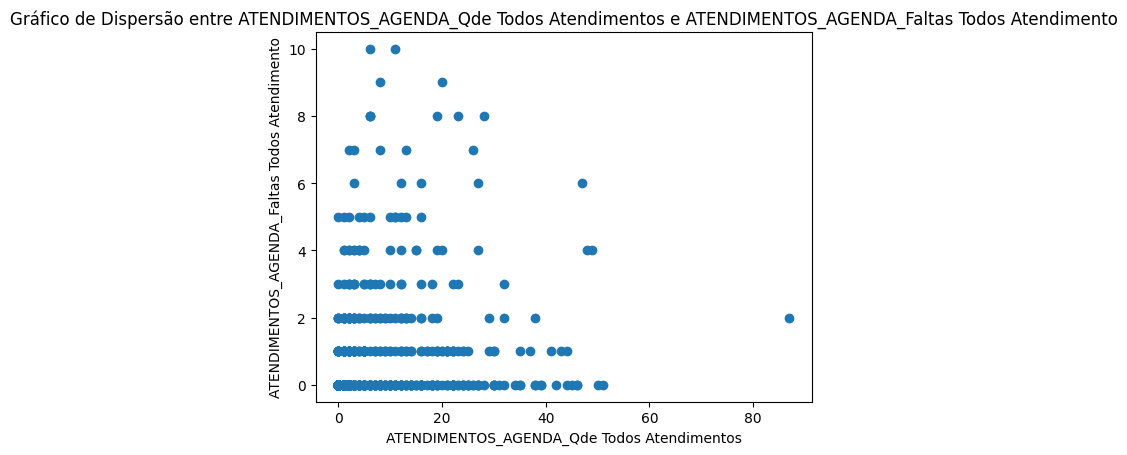

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(data['ATENDIMENTOS_AGENDA_Qde Todos Atendimentos'], data['ATENDIMENTOS_AGENDA_Faltas Todos Atendimento'])
plt.xlabel('ATENDIMENTOS_AGENDA_Qde Todos Atendimentos')
plt.ylabel('ATENDIMENTOS_AGENDA_Faltas Todos Atendimento')
plt.title('Gráfico de Dispersão entre ATENDIMENTOS_AGENDA_Qde Todos Atendimentos e ATENDIMENTOS_AGENDA_Faltas Todos Atendimento')
plt.show()

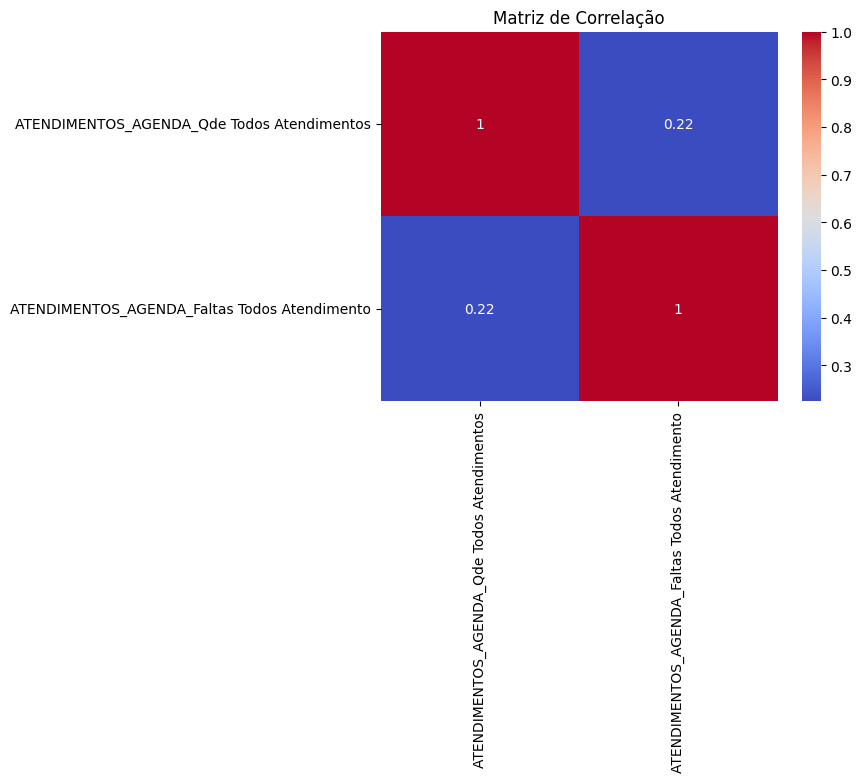

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = data[["ATENDIMENTOS_AGENDA_Qde Todos Atendimentos","ATENDIMENTOS_AGENDA_Faltas Todos Atendimento"]].corr()

# Plote um heatmap da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


## ATENDIMENTOS_AGENDA_Qde Atendimento Médico

Tudo certo por aqui, nada a acrescentar


In [180]:
data['ATENDIMENTOS_AGENDA_Qde Atendimento Médico']

0       0
1       0
2       0
3       0
4       0
       ..
1034    0
1035    0
1036    0
1037    0
1038    0
Name: ATENDIMENTOS_AGENDA_Qde Atendimento Médico, Length: 1039, dtype: int64

In [181]:
data['ATENDIMENTOS_AGENDA_Qde Atendimento Médico'].value_counts()

ATENDIMENTOS_AGENDA_Qde Atendimento Médico
0     847
1     134
2      23
3      22
6       4
5       3
8       2
11      1
7       1
9       1
4       1
Name: count, dtype: int64

## ATENDIMENTOS_AGENDA_Faltas Atendimento Médico

Tudo certo por aqui, nada a acrescentar

In [182]:
data['ATENDIMENTOS_AGENDA_Faltas Atendimento Médico']


0       0
1       0
2       0
3       0
4       0
       ..
1034    0
1035    0
1036    0
1037    0
1038    0
Name: ATENDIMENTOS_AGENDA_Faltas Atendimento Médico, Length: 1039, dtype: int64

In [183]:
data['ATENDIMENTOS_AGENDA_Faltas Atendimento Médico'].value_counts()

ATENDIMENTOS_AGENDA_Faltas Atendimento Médico
0    1024
1      12
2       2
3       1
Name: count, dtype: int64

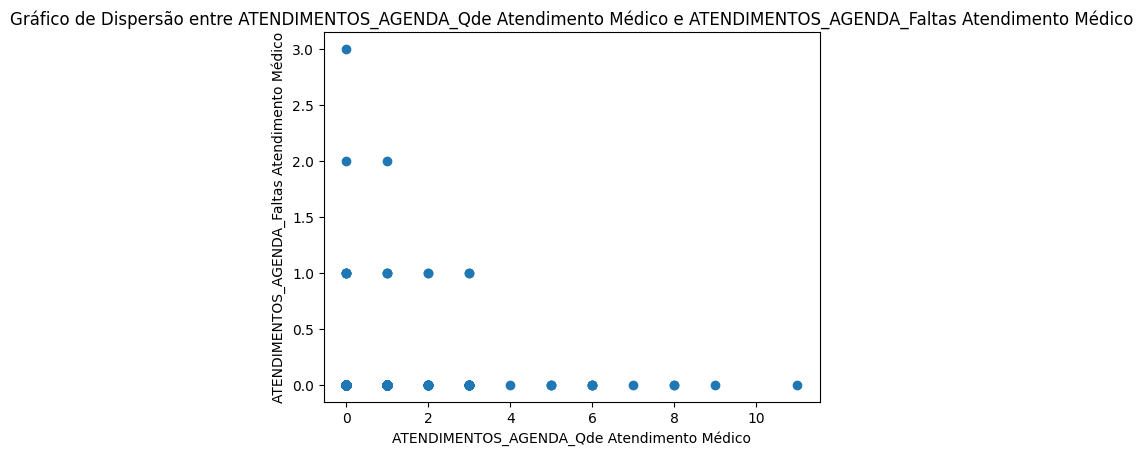

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(data['ATENDIMENTOS_AGENDA_Qde Atendimento Médico'], data['ATENDIMENTOS_AGENDA_Faltas Atendimento Médico'])
plt.xlabel('ATENDIMENTOS_AGENDA_Qde Atendimento Médico')
plt.ylabel('ATENDIMENTOS_AGENDA_Faltas Atendimento Médico')
plt.title('Gráfico de Dispersão entre ATENDIMENTOS_AGENDA_Qde Atendimento Médico e ATENDIMENTOS_AGENDA_Faltas Atendimento Médico')
plt.show()

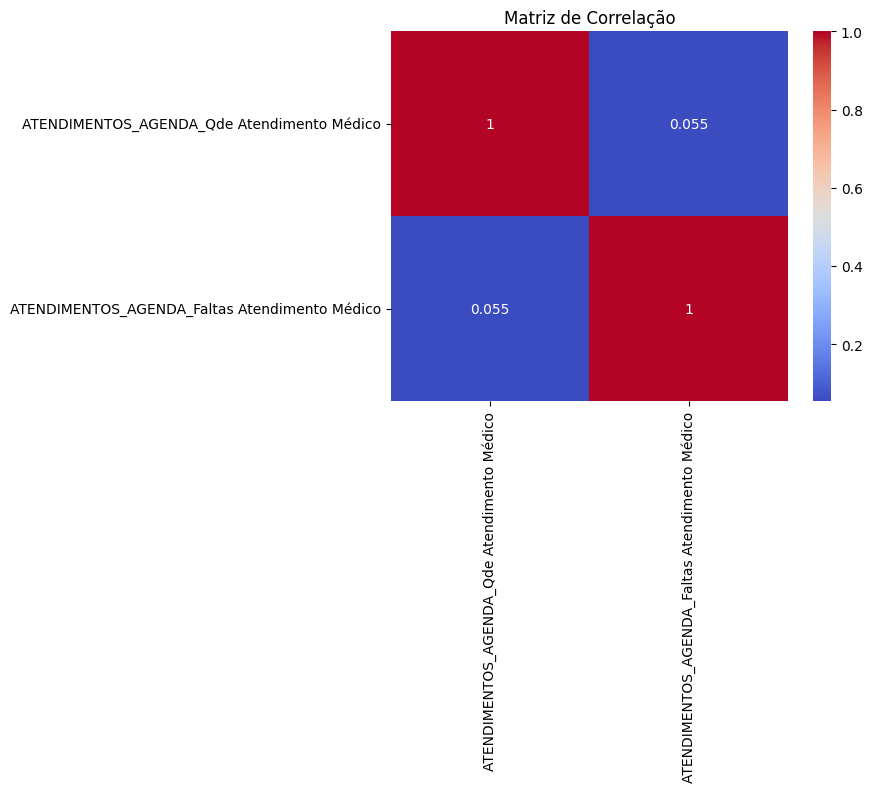

In [185]:
import seaborn as sns

# Calcule a matriz de correlação
correlation_matrix = data[["ATENDIMENTOS_AGENDA_Qde Atendimento Médico","ATENDIMENTOS_AGENDA_Faltas Atendimento Médico"]].corr()


# Plote um heatmap da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

## ATENDIMENTOS_AGENDA_Datas Atendimento Médico

Tudo certo por aqui, nada a acrescentar

In [186]:
data['ATENDIMENTOS_AGENDA_Datas Atendimento Médico']

0       Nunca ocorreu
1       Nunca ocorreu
2       Nunca ocorreu
3       Nunca ocorreu
4       Nunca ocorreu
            ...      
1034    Nunca ocorreu
1035    Nunca ocorreu
1036    Nunca ocorreu
1037    Nunca ocorreu
1038    Nunca ocorreu
Name: ATENDIMENTOS_AGENDA_Datas Atendimento Médico, Length: 1039, dtype: object